# 0.1.0 Load Data
* Codex Data obtained from: http://welikesharingdata.blob.core.windows.net/forshare/index.html
* Manuscript: https://www.cell.com/cell/pdf/S0092-8674(18)30904-8.pdf

In [1]:
import pandas as pd
df = {}

In [2]:
from clustergrammer2 import net

>> clustergrammer2 backend version 0.4.0


In [3]:
import ipywidgets as widgets
import numpy as np
from bqplot import pyplot as plt
import bqplot

In [4]:
from glob import glob

## Check available Files

In [5]:
glob('../data/big_data/*.txt')

['../data/big_data/channelNames_BALBcMRLdataset.txt']

In [6]:
glob('../data/big_data/*.csv')

['../data/big_data/CODEX_MRLdataset_neighborhood_graph.csv',
 '../data/big_data/BALBcMRLdataset_exposuretimes.csv',
 '../data/big_data/Suppl.Table2.CODEX_paper_MRLdatasetexpression.csv']

### Expression Data
See http://welikesharingdata.blob.core.windows.net/forshare/index.html

* CSV file contains mean marker intensities and X, Y, Z corrdinates for each cell relative to the top left corner of its tile. 
* Tile IDs correspond to tile images sorted in the alphanumeric order
* Size parameter corresponds to the cell object sizes in voxels
* "imaging phenotype Cluster ID" column specifies the phenotypic cluster identity as determined by X-shift
* "niche Cluster ID" column specifies the i-niche cluster determined by K-means (K=100)
* neighborhood graph files describes which pairs of cells are adjacent to one another

In [7]:
%%time
df['exp'] = pd.read_csv('../data/big_data/Suppl.Table2.CODEX_paper_MRLdatasetexpression.csv')
new_rows = ['C-' + str(x) for x in df['exp'].index.tolist()]
df['exp'].index = new_rows
print(df['exp'].shape)

(734101, 38)
CPU times: user 9.15 s, sys: 532 ms, total: 9.68 s
Wall time: 8.94 s


In [8]:
df['exp'].head()

,Imaging phenotype cluster ID,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,CD3,CD1632,...,CD44,NKp46,X.X,Y.Y,Z.Z,MHCII,blank_Cy3_cyc15,blank_Cy5_cyc15,sample_Xtile_Ytile,niche cluster ID
C-0,9600,1577.675415,-154.301758,130.692184,-4.168493,560.691345,-504.231476,854.670105,-631.294189,385.935242,...,422.408691,515.130066,10,70,13,6712.812988,1665.967896,398.348389,BALBc-3_X05_Y03,32.0
C-1,9600,1017.838440,-93.069397,144.076584,40.010998,885.595520,-391.357544,62.764454,-474.201172,-469.634583,...,448.701660,171.880310,1000,294,12,2024.678711,1287.959229,421.991425,BALBc-3_X01_Y02,99.0
C-2,9600,5978.459961,-330.099365,139.631744,-82.840302,1747.897583,-395.508820,954.326782,-1026.204468,3744.718262,...,2229.804443,512.220764,1003,107,8,8647.193359,2817.173828,709.545105,BALBc-2_X05_Y04,74.0
C-3,9600,6119.109375,-54.384808,-768.871704,25.625927,1065.311890,-485.535431,538.404175,-611.836426,865.842590,...,665.720459,351.108246,1003,113,13,4838.463379,1646.660278,408.523590,BALBc-2_X03_Y04,98.0
C-4,9600,6272.474609,-235.512405,74.058075,-101.729919,1186.295044,-782.744995,1261.625366,-915.565552,1361.536011,...,2065.742676,259.003235,1003,148,9,5092.891602,2161.109131,713.416199,BALBc-2_X02_Y01,71.0


In [9]:
cols = df['exp'].columns.tolist()
cols

['Imaging phenotype cluster ID',
 'CD45',
 'Ly6C',
 'TCR',
 'Ly6G',
 'CD19',
 'CD169',
 'CD106',
 'CD3',
 'CD1632',
 'CD8a',
 'CD90',
 'F480',
 'CD11c',
 'Ter119',
 'CD11b',
 'IgD',
 'CD27',
 'CD5',
 'CD79b',
 'CD71',
 'CD31',
 'CD4',
 'IgM',
 'B220',
 'ERTR7',
 'CD35',
 'CD2135',
 'CD44',
 'NKp46',
 'X.X',
 'Y.Y',
 'Z.Z',
 'MHCII',
 'blank_Cy3_cyc15',
 'blank_Cy5_cyc15',
 'sample_Xtile_Ytile',
 'niche cluster ID']

In [10]:
exp_cols = cols[1:30]
exp_cols

['CD45',
 'Ly6C',
 'TCR',
 'Ly6G',
 'CD19',
 'CD169',
 'CD106',
 'CD3',
 'CD1632',
 'CD8a',
 'CD90',
 'F480',
 'CD11c',
 'Ter119',
 'CD11b',
 'IgD',
 'CD27',
 'CD5',
 'CD79b',
 'CD71',
 'CD31',
 'CD4',
 'IgM',
 'B220',
 'ERTR7',
 'CD35',
 'CD2135',
 'CD44',
 'NKp46']

In [11]:
unique_dict = {}
for inst_col in cols:
    inst_list_unique = list(df['exp'][inst_col].unique())
    unique_dict[inst_col] = inst_list_unique    
    inst_num_unique = len(inst_list_unique)
    print(inst_col, inst_num_unique)

Imaging phenotype cluster ID 58
CD45 726877
Ly6C 731257
TCR 731035
Ly6G 729442
CD19 726981
CD169 730498
CD106 727870
CD3 730526
CD1632 728506
CD8a 728773
CD90 728172
F480 731091
CD11c 725943
Ter119 728879
CD11b 725897
IgD 730293
CD27 727817
CD5 730295
CD79b 727003
CD71 729364
CD31 725039
CD4 730112
IgM 727925
B220 729995
ERTR7 729781
CD35 728492
CD2135 729290
CD44 727003
NKp46 723719
X.X 1342
Y.Y 1006
Z.Z 15
MHCII 729269
blank_Cy3_cyc15 721818
blank_Cy5_cyc15 720065
sample_Xtile_Ytile 565
niche cluster ID 101


### Select Single Image Tile
BALBc: normal tissue
MRL/lpr: spleen from animals with systemic autoimmune disease

Start with: 'BALBc-1_X01_Y01'

In [12]:
keep_rows = []
for inst_tile in ['BALBc-1_X01_Y01']:

    ser_tile = df['exp']['sample_Xtile_Ytile']
    ser_found = ser_tile[ser_tile == inst_tile]
    ser_found.shape
    keep_rows.extend(ser_found.index.tolist())
    
df['tile'] = df['exp'].loc[keep_rows].transpose()
df['tile'].shape    

cats = df['tile'].loc['Imaging phenotype cluster ID']
new_cols = []
# cols = df['tile'].columns.tolist()
# for index in range(len(cols)):
    
#     new_col = (cols[index], 'Cat: ID-' + str(cats[index]))
#     new_cols.append(new_col)
# df['tile'].columns = new_cols

In [13]:
df['tile'].head()

,C-643,C-1264,C-1589,C-1611,C-1873,C-1877,C-1935,C-2478,C-2866,C-2988,...,C-252970,C-253039,C-253092,C-253107,C-253453,C-253953,C-253959,C-253982,C-253998,C-254183
Imaging phenotype cluster ID,9640,9640,9640,9640,9640,9640,9640,9640,9640,9640,...,9644,9644,9641,9641,9626,9593,9626,9626,9626,9626
CD45,4616.2,1820.99,2748.41,1670.64,1783.57,2547.93,1738.63,615.305,2149.2,440.949,...,-2348.57,843.912,-3521.28,-1917.95,443.36,2819.63,-1190.71,2899.05,1441.02,12.1902
Ly6C,109.183,-193.429,1080.91,162.775,-83.4236,-140.051,-193.584,309.844,302.463,-6.71526,...,171.232,-111.202,15.7832,4.47499,122.234,308.756,108.913,305.457,-56.8833,-279.542
TCR,56.6081,-253.548,155.409,479.413,980.42,232.764,55.9894,783.197,1934.21,-750.628,...,79.5385,-230.033,-4116.93,-913.138,-670.956,-126.491,-2378.61,-3116.76,-2565.78,-280.237
Ly6G,16.1121,-108.621,290.299,156.224,79.3494,95.8747,-188.539,135.255,175.713,50.1617,...,127.419,-211.499,-23.9587,-18.6289,126.662,220.97,90.1604,112.483,-182.167,282.651


### Plot Tile Expression Levels

In [14]:
df['tile-exp-ini'] = df['tile'].loc[exp_cols]
df['tile-exp-ini'].shape

(29, 1127)

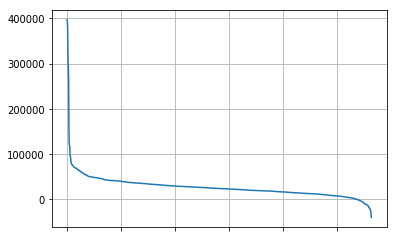

In [15]:
ser_sum = df['tile-exp-ini'].sum(axis=0).sort_values(ascending=False)
ser_sum.plot(grid=True)

### Drop cells with total marker levels above 100,000 and below 0

In [16]:
print(ser_sum.shape)
ser_sum = ser_sum[ser_sum < 100000]
print(ser_sum.shape)
ser_sum = ser_sum[ser_sum > 0]
print(ser_sum.shape)
keep_cells = ser_sum.index.tolist()

(1127,)
(1116,)
(1059,)


In [17]:
df['tile-exp'] = df['tile-exp-ini'][keep_cells]
df['tile-exp'].shape

(29, 1059)

### Set Negative Expression Levels to Zero

In [18]:
df['tile-exp'][df['tile-exp'] < 0] = 0

/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [19]:
df['tile-exp'].transpose().describe()

,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,CD3,CD1632,CD8a,...,CD71,CD31,CD4,IgM,B220,ERTR7,CD35,CD2135,CD44,NKp46
count,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,...,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0
unique,971.0,686.0,872.0,655.0,973.0,545.0,979.0,499.0,940.0,877.0,...,760.0,1020.0,719.0,909.0,766.0,892.0,1011.0,802.0,957.0,1005.0
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,89.0,374.0,188.0,405.0,87.0,515.0,81.0,561.0,120.0,183.0,...,300.0,40.0,341.0,151.0,294.0,168.0,49.0,258.0,103.0,55.0


In [20]:
# df['tile-exp-ash'] = np.arcsinh(df['tile-exp']/5)

In [21]:
df['tile-exp'][df['tile-exp'] > 5000] = 5000

/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [22]:
# ser_vals = pd.Series(df['tile-exp'].get_values().flatten())
# ser_vals.hist(bins=100)

In [23]:
df['tile-exp'].shape

(29, 1059)

### Location of Cells

In [25]:
df['tile-loc'] = df['tile'].loc[['X.X', 'Y.Y']][keep_cells].transpose()
df['tile-loc'].shape

(1059, 2)

In [26]:
df['tile-loc'] = df['tile-loc'].astype('int')

In [51]:
def set_expression_opacity(inst_gene):
    ser_opacity = df['tile-exp'].loc[inst_gene]
    list_opacity = [float(x/ser_opacity.max()) for x in list(ser_opacity.get_values())]
    scatter.default_opacities = list_opacity

In [54]:
fig = plt.figure(title='Scatter')
def_tt = bqplot.Tooltip(fields=['name'], formats=[''])

scatter = plt.scatter(df['tile-loc']['X.X'], 
                      df['tile-loc']['Y.Y'], 
                      figsize=(20,10), 
                      ylim=(0,1000), 
                      xlim=(0,1000), stroke='black', 
                      tooltip=def_tt, 
                      names=df['tile-loc'].index.tolist(), 
                      display_names=False)

inst_width = 900
fig.layout.min_height = str(inst_width/1.2) + 'px'
fig.layout.min_width = str(inst_width) + 'px'

# scatter.default_opacities = [0.5] 
# scatter.default_opacities = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.2, 0.1, 0.1]

set_expression_opacity('NKp46')

scatter.default_size = 250
scatter.colors = ['red']

### Expression Levels

In [24]:
net.load_df(df['tile-exp'])
net.widget()

ExampleWidget(network='{"row_nodes": [{"name": "CD45", "ini": 29, "clust": 20, "rank": 27, "rankvar": 25, "gro…

### Updating the Marker Opacity

In [55]:
fig

Figure(axes=[Axis(scale=LinearScale(), side='bottom'), Axis(orientation='vertical', scale=LinearScale(), side=…

In [58]:
# ser_opacity = df['tile-exp'].loc['CD106']
# ser_opacity = df['tile-exp'].loc['CD44']
ser_opacity = df['tile-exp'].loc['CD45']
# ser_opacity = df['tile-exp'].loc['NKp46']
# ser_opacity = df['tile-exp'].loc['IgD']
# ser_opacity = df['tile-exp'].loc['IgM']
list_opacity = [float(x/ser_opacity.max()) for x in list(ser_opacity.get_values())]
scatter.default_opacities = list_opacity